<h1 align="center"> GAZA JOB MATCHING CODE</h1>

<center>

  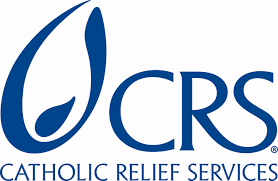

</center>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from numpy import argmax
import re

In [ ]:
dP=pd.read_excel('/content/CFW.I.A Participant Odata.xlsx')
dE=pd.read_excel('/content/Appended employer needs.xlsx')
dM=pd.read_excel('/content/Education Mapping.xlsx')

In [ ]:
pd.options.display.max_columns=500

In [ ]:
#k
#unique_list = []
#for x in k:
  #if x not in unique_list:
    #unique_list.append(x)

### Data cleaning, Education Mapping and Position story

In [ ]:
dP=dP[dP['TOTAL_WEIGHT_COHORT_2']!='---']
dP=dP[dP['TOTAL_WEIGHT_COHORT_2'].isnull()==False].reset_index().drop('index', axis=1)
dP['TOTAL_WEIGHT_COHORT_2']=dP['TOTAL_WEIGHT_COHORT_2'].astype('float64')
dP['TOTAL_WEIGHT_COHORT_2_']=dP['TOTAL_WEIGHT_COHORT_2']
#dP['sex_']=dP['sex'].str.lower()
dP['sex_']=dP['sex'].replace(['Female', 'Male'], ['F', 'M'])
dE['Gender accommodation_']=dE['Gender accommodation'].replace(['Only_male', 'Either_male_or_female', 'Only_female'], ['M', 'MF', 'F'])

In [ ]:
#L=[]
for i in range(len(dP)):
  if (dP.loc[i, 'Education_specialization'] in dM['Education_specialization_id'].to_list()):
    k=dP.loc[i, 'Education_specialization']
    dP.loc[i, 'Education_Position_1']=dM[dM['Education_specialization_id']==k]['Position_1'].tolist()[0]
    dP.loc[i, 'Education_Position_2']=dM[dM['Education_specialization_id']==k]['Position_2'].tolist()[0]
    dP.loc[i, 'Education_Position_3']=dM[dM['Education_specialization_id']==k]['Position_3'].tolist()[0]
  #else:
    #L.append(i)
    #dP.loc[i, 'Education_Position_1']=dP.loc[i, 'Education_specialization']
    #dP.loc[i, 'Education_Position_2']=dP.loc[i, 'Education_specialization']
    #dP.loc[i, 'Education_Position_3']=dP.loc[i, 'Education_specialization']

In [ ]:
#for i in range(len(dP)):
  #try:
    #dP.loc[i, 'Education_specialization']=dP.loc[i, 'Education_specialization'].replace('(please specify)', '')
    #dP.loc[i, 'Education_Position']=dP.loc[i, 'Education_Position'].replace('(please specify)', '')
    #dP.loc[i, 'previous_work_sector']=dP.loc[i, 'previous_work_sector'].replace('(please specify)', '')
  #except:
    #pass

In [ ]:
#dP['Positions_story']=dP['Education_Position_1']
#dP_=dP[dP['Positions_story']=='---']
#dP_1=dP[dP['Positions_story'].isnull()]
#L=pd.concat([dP_, dP_1]).index.tolist()
#T=[i for i in dP['Positions_story'].index.tolist() if i not in L]
#for i in L:
  #if (dP.loc[i, 'Previous_type_of_work']!='---' and str(dP.loc[i, 'Previous_type_of_work'])!='nan'):
    #dP.loc[i, 'Positions_story']=dP.loc[i, 'Previous_type_of_work']
    #dP.loc[i, 'used_column']='Previous_type_of_work'
  #elif (dP.loc[i, 'Previous_type_of_work_2']!='---' and str(dP.loc[i, 'Previous_type_of_work_2'])!='nan'):
    #dP.loc[i, 'Positions_story']=dP.loc[i, 'Previous_type_of_work_2']
    #dP.loc[i, 'used_column']='Previous_type_of_work_2'
  #elif (dP.loc[i, 'Previous_type_of_work_3']!='---' and str(dP.loc[i, 'Previous_type_of_work_3'])!='nan'):
    #dP.loc[i, 'Positions_story']=dP.loc[i, 'Previous_type_of_work_3']
    #dP.loc[i, 'used_column']='Previous_type_of_work_3'
  #elif (dP.loc[i, 'Preferred_type_of_work']!='---' and str(dP.loc[i, 'Preferred_type_of_work'])!='nan'):
    #dP.loc[i, 'Positions_story']=dP.loc[i, 'Preferred_type_of_work']
    #dP.loc[i, 'used_column']='Preferred_type_of_work'
  #elif (dP.loc[i, 'Preferred_type_of_work_2']!='---' and str(dP.loc[i, 'Preferred_type_of_work_2'])!='nan'):
    #dP.loc[i, 'Positions_story']=dP.loc[i, 'Preferred_type_of_work_2']
    #dP.loc[i, 'used_column']='Preferred_type_of_work_2'
  #elif (dP.loc[i, 'Preferred_type_of_work_3']!='---' and str(dP.loc[i, 'Preferred_type_of_work_3'])!='nan'):
    #dP.loc[i, 'Positions_story']=dP.loc[i, 'Preferred_type_of_work_3']
    #dP.loc[i, 'used_column']='Preferred_type_of_work_3'
#for i in T:
  #dP.loc[i, 'used_column']='Education_Position_1'

## Matching: Filters and language model-based Modeling

In [ ]:
pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

CFI/A

In [ ]:
#CFI/A
#Filtering
#dP_e=dP[dP['Positions_story'].isnull()==False]
#dP_e=dP_e[dP_e['Positions_story']!='---']
dP_t=dP[dP['Type_of_service'].str.contains('CFI|CFA')].reset_index().drop('index', axis=1)
dP_tt=pd.DataFrame()
dE_n=dE[dE['Type_of_service'].str.contains('CFA|CFI')].reset_index().drop('index', axis=1)
#dE_n=dE.copy()

P=dE_n['Required_position'].tolist()
#P=dE['Required_position'].tolist()
#L=dP_t['Positions_story'].tolist()



#Modeling
#T=model.encode(L)
R=model.encode(P)
col=['Education_Position_1', 'Education_Position_2', 'Education_Position_3', 'Previous_type_of_work', 'Previous_type_of_work_2', 'Previous_type_of_work_3', 'Preferred_type_of_work', 'Preferred_type_of_work_2', 'Preferred_type_of_work_3']
bc=0
for i in range(len(dP_t)):
  coln=[]
  colnn=[]
  if (dP_t.loc[i, 'Education_Position_1']!='---' and str(dP_t.loc[i, 'Education_Position_1'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Education_Position_1'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Education_Position_2']!='---' and str(dP_t.loc[i, 'Education_Position_2'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Education_Position_2'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Education_Position_3']!='---' and str(dP_t.loc[i, 'Education_Position_3'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Education_Position_3'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Previous_type_of_work']!='---' and str(dP_t.loc[i, 'Previous_type_of_work'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Previous_type_of_work'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Previous_type_of_work_2']!='---' and str(dP_t.loc[i, 'Previous_type_of_work_2'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Previous_type_of_work_2'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Previous_type_of_work_3']!='---' and str(dP_t.loc[i, 'Previous_type_of_work_3'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Previous_type_of_work_3'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Preferred_type_of_work']!='---' and str(dP_t.loc[i, 'Preferred_type_of_work'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Preferred_type_of_work'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Preferred_type_of_work_2']!='---' and str(dP_t.loc[i, 'Preferred_type_of_work_2'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Preferred_type_of_work_2'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Preferred_type_of_work_3']!='---' and str(dP_t.loc[i, 'Preferred_type_of_work_3'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Preferred_type_of_work_3'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)

  #jmaxcoln=coln.index(max(coln))
  #jmaxcolnn=colnn[jmaxcoln]
  #jmax=max(jmaxcolnn)
  result_=[t_ for t_ in range(len(coln)) if coln[t_]==max(coln)]
  resultc=[colnn[t] for t in result_]
  ni=[]
  DS=[]
  for n in resultc:
    result=[t for t in range(len(n)) if n[t]==max(n)]
    GOV=[j for j in result if dP_t.loc[i, 'Governorate']==dE_n.loc[j, 'Required_position_governorate']]
    SEX=[s for s in GOV if dP_t.loc[i, 'sex_'] in dE_n.loc[s, 'Gender accommodation_'].replace('_', ',')]
    if str(dP_t.loc[i, 'Disability_communication_status'])=='Disabled':
      DIS_1=[s for s in SEX if str(dE_n.loc[s, 'Difficulty_communicating'])=='nan']
    elif str(dP_t.loc[i, 'Disability_communication_status'])!='Disabled':
      DIS_1=[s for s in SEX]
    if str(dP_t.loc[i, 'Disability_hearing_status'])=='Disabled':
      DIS_2=[s for s in SEX if str(dE_n.loc[s, 'Difficulty_hearing'])=='nan']
    elif str(dP_t.loc[i, 'Disability_hearing_status'])!='Disabled':
      DIS_2=[s for s in SEX]
    if str(dP_t.loc[i, 'Disability_memory_status'])=='Disabled':
      DIS_3=[s for s in SEX if str(dE_n.loc[s, 'Difficulty_remembering'])=='nan']
    elif str(dP_t.loc[i, 'Disability_memory_status'])!='Disabled':
      DIS_3=[s for s in SEX]
    if str(dP_t.loc[i, 'Disability_sight_status'])=='Disabled':
      DIS_4=[s for s in SEX if str(dE_n.loc[s, 'Difficulty_seeing'])=='nan']
    elif str(dP_t.loc[i, 'Disability_sight_status'])!='Disabled':
      DIS_4=[s for s in SEX]
    if str(dP_t.loc[i, 'Disability_mobility_status'])=='Disabled':
      DIS_5=[s for s in SEX if str(dE_n.loc[s, 'Difficulty_walking'])=='nan']
    elif str(dP_t.loc[i, 'Disability_mobility_status'])!='Disabled':
      DIS_5=[s for s in SEX]
    if str(dP_t.loc[i, 'Disability_self_care_status'])=='Disabled':
      DIS_6=[s for s in SEX if str(dE_n.loc[s, 'Difficulty_with_self-care'])=='nan']
    elif str(dP_t.loc[i, 'Disability_self_care_status'])!='Disabled':
      DIS_6=[s for s in SEX]
    DIS=[s for s in SEX if (s in DIS_1) and (s in DIS_2) and (s in DIS_3) and (s in DIS_4) and (s in DIS_5) and (s in DIS_6)]
    DS.append(DIS)
    ni.append(len(DIS))
  jmaxx=ni.index(max(ni))
  DIS_=DS[jmaxx]
  n=resultc[jmaxx]
  #result=[t for t in range(len(n)) if n[t]==max(n)]
  #GOV=[j for j in result if dP_t.loc[i, 'Governorate']==dE_n.loc[j, 'Required_position_governorate']]
  #SEX=[s for s in GOV if dP_t.loc[i, 'sex_'] in dE_n.loc[s, 'Gender accommodation_'].replace('_', ',')]
  #jmax=cos.index(max(cos))
  jmaxcoln=colnn.index(resultc[jmaxx])
  try:
    for se in range(len(DIS_)):
      jmax=DIS_[se]
      dP_tt.loc[bc, 'caseid']=dP_t.loc[i, 'caseid']
      dP_tt.loc[bc, 'Participation_status']=dP_t.loc[i, 'Participation_status']
      dP_tt.loc[bc, 'Education_Position_1']=dP_t.loc[i, 'Education_Position_1']
      dP_tt.loc[bc, 'Education_Position_2']=dP_t.loc[i, 'Education_Position_2']
      dP_tt.loc[bc, 'Education_Position_3']=dP_t.loc[i, 'Education_Position_3']
      dP_tt.loc[bc, 'Previous_type_of_work']=dP_t.loc[i, 'Previous_type_of_work']
      dP_tt.loc[bc, 'Previous_type_of_work_2']=dP_t.loc[i, 'Previous_type_of_work_2']
      dP_tt.loc[bc, 'Previous_type_of_work_3']=dP_t.loc[i, 'Previous_type_of_work_3']
      dP_tt.loc[bc, 'Preferred_type_of_work']=dP_t.loc[i, 'Preferred_type_of_work']
      dP_tt.loc[bc, 'Preferred_type_of_work_2']=dP_t.loc[i, 'Preferred_type_of_work_2']
      dP_tt.loc[bc, 'Preferred_type_of_work_3']=dP_t.loc[i, 'Preferred_type_of_work_3']
      dP_tt.loc[bc, 'Type_of_service']=dP_t.loc[i, 'Type_of_service']
      dP_tt.loc[bc, 'Education_level']=dP_t.loc[i, 'Education_level']
      dP_tt.loc[bc, 'Age']=dP_t.loc[i, 'Age']
      dP_tt.loc[bc, 'Disability_communication']=dP_t.loc[i, 'Disability_communication_status']
      dP_tt.loc[bc, 'Disability_hearing']=dP_t.loc[i, 'Disability_hearing_status']
      dP_tt.loc[bc, 'Disability_memory']=dP_t.loc[i, 'Disability_memory_status']
      dP_tt.loc[bc, 'Disability_mobility']=dP_t.loc[i, 'Disability_mobility_status']
      dP_tt.loc[bc, 'Disability_self_care']=dP_t.loc[i, 'Disability_self_care_status']
      dP_tt.loc[bc, 'Disability_sight']=dP_t.loc[i, 'Disability_sight_status']
      dP_tt.loc[bc, 'Governorate']=dP_t.loc[i, 'Governorate']
      dP_tt.loc[bc, 'sex']=dP_t.loc[i, 'sex']
      dP_tt.loc[bc, 'TOTAL_WEIGHT_COHORT_2']=dP_t.loc[i, 'TOTAL_WEIGHT_COHORT_2']
      dP_tt.loc[bc, 'TOTAL_WEIGHT_COHORT_2_']=dP_t.loc[i, 'TOTAL_WEIGHT_COHORT_2_']
      dP_tt.loc[bc, 'used_column']=col[jmaxcoln]
      dP_tt.loc[bc, 'Matched_Employer']=dE_n.loc[jmax, 'caseid']
      dP_tt.loc[bc, 'Matched_Employer_Governorate']=dE_n.loc[jmax, 'Required_position_governorate']
      dP_tt.loc[bc, 'Matched_Employer_female_opportunity']=dE_n.loc[jmax, 'ONLY FEMALE']
      dP_tt.loc[bc, 'Matched_Employer_male_opportunity']=dE_n.loc[jmax, 'ONLY MALE']
      dP_tt.loc[bc, 'Matched_Employer_both_sex_opportunity']=dE_n.loc[jmax, 'EITHER MALE OR FEMALE']
      dP_tt.loc[bc, 'Matched_Employer_Gender_accommodation']=dE_n.loc[jmax, 'Gender accommodation']
      #dP_tt.loc[bc, 'Matched_Employer_age_30']=dE_n.loc[jmax, 'Under_age_30']
      #dP_tt.loc[bc, 'Matched_Employer_age_50']=dE_n.loc[jmax, 'Over_age_50']
      #dP_tt.loc[bc, 'Matched_Employer_Diploma']=dE_n.loc[jmax, 'Diploma_2_year_degree']
      #dP_tt.loc[bc, 'Matched_Employer_TVET']=dE_n.loc[jmax, 'TVET_Certificate']
      #dP_tt.loc[bc, 'Matched_Employer_Bachelors']=dE_n.loc[jmax, 'Bachelors_degree']
      #dP_tt.loc[bc, 'Matched_Employer_Masters']=dE_n.loc[jmax, 'Masters_degree']
      #dP_tt.loc[bc, 'Matched_Employer_PhD']=dE_n.loc[jmax, 'PhD']
      #dP_tt.loc[bc, 'Matched_Employer_experience']=dE_n.loc[jmax, 'Employment_certificate_Work_experience']
      dP_tt.loc[bc, 'Matched_Employer_disability_communic']=dE_n.loc[jmax, 'Difficulty_communicating']
      dP_tt.loc[bc, 'Matched_Employer_disability_hear']=dE_n.loc[jmax, 'Difficulty_hearing']
      dP_tt.loc[bc, 'Matched_Employer_disability_memory']=dE_n.loc[jmax, 'Difficulty_remembering']
      dP_tt.loc[bc, 'Matched_Employer_disability_seeing']=dE_n.loc[jmax, 'Difficulty_seeing']
      dP_tt.loc[bc, 'Matched_Employer_disability_walk']=dE_n.loc[jmax, 'Difficulty_walking']
      dP_tt.loc[bc, 'Matched_Employer_disability_self_care']=dE_n.loc[jmax, 'Difficulty_with_self-care']
      dP_tt.loc[bc, 'Matched_Employer_Total']=dE_n.loc[jmax, 'Total number of required participants']
      dP_tt.loc[bc, 'Matched_Employer_position']=dE_n.loc[jmax, 'Required_position']
      dP_tt.loc[bc, 'Matched_Employer_Submission_date']=dE_n.loc[jmax, 'Submission date']
      dP_tt.loc[bc, 'Matched_score']=max(n)
      bc+=1
  except:
    pass

In [ ]:
dP_t_I=dP_tt[['caseid', 'Matched_Employer', 'Participation_status', 'Education_Position_1', 'Education_Position_2', 'Education_Position_3', 'Previous_type_of_work', 'Previous_type_of_work_2', 'Previous_type_of_work_3', 'Preferred_type_of_work', 'Preferred_type_of_work_2', 'Preferred_type_of_work_3', 'Matched_Employer_position', 'Matched_Employer_Submission_date', 'Type_of_service', 'Education_level', 'Matched_score', 'Age', 'Matched_Employer_disability_communic', 'Matched_Employer_disability_hear', 'Matched_Employer_disability_memory', 'Matched_Employer_disability_seeing', 'Matched_Employer_disability_walk', 'Matched_Employer_disability_self_care', 'Disability_communication', 'Disability_hearing', 'Disability_memory', 'Disability_mobility', 'Disability_self_care', 'Disability_sight', 'Governorate', 'Matched_Employer_Governorate', 'sex', 'Matched_Employer_female_opportunity', 'Matched_Employer_male_opportunity', 'Matched_Employer_both_sex_opportunity', 'Matched_Employer_Total', 'Matched_Employer_Gender_accommodation', 'used_column', 'TOTAL_WEIGHT_COHORT_2', 'TOTAL_WEIGHT_COHORT_2_']]

In [ ]:
dP_t_I=dP_t_I[dP_t_I['Matched_Employer'].isnull()==False].reset_index().drop('index', axis=1)

In [ ]:
####### Requirement numbers
POS=[]
L=dP_t_I['Matched_Employer'].unique()
dR=pd.DataFrame()
for i in L:
  dE_i=dP_t_I[dP_t_I['Matched_Employer']==i]
  t=dE_i['Matched_Employer_position'].unique()
  rk=dE_i[dE_i['sex']=='Female'].index.tolist()
  r_1=dE_i[dE_i['Disability_communication']=='Disabled'].index.tolist()
  r_2=dE_i[dE_i['Disability_hearing']=='Disabled'].index.tolist()
  r_3=dE_i[dE_i['Disability_memory']=='Disabled'].index.tolist()
  r_4=dE_i[dE_i['Disability_mobility']=='Disabled'].index.tolist()
  r_5=dE_i[dE_i['Disability_self_care']=='Disabled'].index.tolist()
  r_6=dE_i[dE_i['Disability_sight']=='Disabled'].index.tolist()
  for j in t:
    M=dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_male_opportunity']
    F=dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_female_opportunity']
    MF=dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_both_sex_opportunity']
    T=dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_Total']
    if MF!=0:
      for r in rk:
        dE_i.loc[r, 'TOTAL_WEIGHT_COHORT_2_']=dP['TOTAL_WEIGHT_COHORT_2_'].max() + 1

    if str(dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_disability_communic'])=='nan':
      for r in r_1:
        dE_i.loc[r, 'TOTAL_WEIGHT_COHORT_2_']=dP['TOTAL_WEIGHT_COHORT_2_'].max() + 1
    if str(dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_disability_hear'])=='nan':
      for r in r_2:
        dE_i.loc[r, 'TOTAL_WEIGHT_COHORT_2_']=dP['TOTAL_WEIGHT_COHORT_2_'].max() + 1
    if str(dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_disability_memory'])=='nan':
      for r in r_3:
        dE_i.loc[r, 'TOTAL_WEIGHT_COHORT_2_']=dP['TOTAL_WEIGHT_COHORT_2_'].max() + 1
    if str(dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_disability_walk'])=='nan':
      for r in r_4:
        dE_i.loc[r, 'TOTAL_WEIGHT_COHORT_2_']=dP['TOTAL_WEIGHT_COHORT_2_'].max() + 1
    if str(dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_disability_self_care'])=='nan':
      for r in r_5:
        dE_i.loc[r, 'TOTAL_WEIGHT_COHORT_2_']=dP['TOTAL_WEIGHT_COHORT_2_'].max() + 1
    if str(dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_disability_seeing'])=='nan':
      for r in r_6:
        dE_i.loc[r, 'TOTAL_WEIGHT_COHORT_2_']=dP['TOTAL_WEIGHT_COHORT_2_'].max() + 1

    dE_it=dE_i[dE_i['Matched_Employer_position']==j].sort_values(by='TOTAL_WEIGHT_COHORT_2_', ascending=False)
    for cs in dE_it['caseid'].unique().tolist():
      if cs in POS:
        dE_it=dE_it[dE_it['caseid']!=cs].sort_values(by='TOTAL_WEIGHT_COHORT_2_', ascending=False)
    dE_M=dE_it[dE_it['sex']=='Male'].head(int(M))
    dE_F=dE_it[dE_it['sex']=='Female'].head(int(F))
    dE_MF=dE_it.head(int(MF))
    #dE_T=dE_it.head(int(T))
    dR_=pd.concat([dE_M, dE_F, dE_MF])
    for css in dR_['caseid'].unique().tolist():
      POS.append(css)
    dR=pd.concat([dR, dR_])
    #dR=pd.concat([dR, dE_T])
    #if len(dE_T) < T:
      #print(i)
      #print(j)
      #print(dE_it)
dp_t_f=dR.sort_values(by='TOTAL_WEIGHT_COHORT_2', ascending=False)

CFW

In [ ]:
#CFW(Skilled/Unskilled)

dP_t=dP[dP['Type_of_service']=='CFW'].reset_index().drop('index', axis=1)
dP_tt=pd.DataFrame()
dE_n=dE[dE['Type_of_service'].str.contains('CFW')].reset_index().drop('index', axis=1)
#dE_n=dE.copy()

P=dE_n['Required_position'].tolist()
#P=dE['Required_position'].tolist()
#L=dP_t['Positions_story'].tolist()



#Modeling
#T=model.encode(L)
R=model.encode(P)
col=['Previous_type_of_work', 'Previous_type_of_work_2', 'Previous_type_of_work_3', 'Preferred_type_of_work', 'Preferred_type_of_work_2', 'Preferred_type_of_work_3', 'Education_Position_1', 'Education_Position_2', 'Education_Position_3']
bc=0
for i in range(len(dP_t)):
  coln=[]
  colnn=[]
  if (dP_t.loc[i, 'Previous_type_of_work']!='---' and str(dP_t.loc[i, 'Previous_type_of_work'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Previous_type_of_work'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Previous_type_of_work_2']!='---' and str(dP_t.loc[i, 'Previous_type_of_work_2'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Previous_type_of_work_2'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Previous_type_of_work_3']!='---' and str(dP_t.loc[i, 'Previous_type_of_work_3'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Previous_type_of_work_3'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Preferred_type_of_work']!='---' and str(dP_t.loc[i, 'Preferred_type_of_work'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Preferred_type_of_work'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Preferred_type_of_work_2']!='---' and str(dP_t.loc[i, 'Preferred_type_of_work_2'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Preferred_type_of_work_2'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Preferred_type_of_work_3']!='---' and str(dP_t.loc[i, 'Preferred_type_of_work_3'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Preferred_type_of_work_3'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Education_Position_1']!='---' and str(dP_t.loc[i, 'Education_Position_1'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Education_Position_1'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Education_Position_2']!='---' and str(dP_t.loc[i, 'Education_Position_2'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Education_Position_2'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)
  if (dP_t.loc[i, 'Education_Position_3']!='---' and str(dP_t.loc[i, 'Education_Position_3'])!='nan'):
    z=model.encode(dP_t.loc[i, 'Education_Position_3'])
    cos=cosine_similarity(z.reshape(1,768), R)[0].tolist()
    cos=[round(cos[t], 4) for t in range(len(cos))]
    coss=max(cos)
  else:
    cos=[-1 for i in range(len(dE_n))]
    coss=-1
  coln.append(coss)
  colnn.append(cos)

  #jmaxcoln=coln.index(max(coln))
  #jmaxcolnn=colnn[jmaxcoln]
  #jmax=max(jmaxcolnn)
  result_=[t_ for t_ in range(len(coln)) if coln[t_]==max(coln)]
  resultc=[colnn[t] for t in result_]
  ni=[]
  DS=[]
  for n in resultc:
    result=[t for t in range(len(n)) if n[t]==max(n)]
    GOV=[j for j in result if dP_t.loc[i, 'Governorate']==dE_n.loc[j, 'Required_position_governorate']]
    SEX=[s for s in GOV if dP_t.loc[i, 'sex_'] in dE_n.loc[s, 'Gender accommodation_'].replace('_', ',')]
    if str(dP_t.loc[i, 'Disability_communication_status'])=='Disabled':
      DIS_1=[s for s in SEX if str(dE_n.loc[s, 'Difficulty_communicating'])=='nan']
    elif str(dP_t.loc[i, 'Disability_communication_status'])!='Disabled':
      DIS_1=[s for s in SEX]
    if str(dP_t.loc[i, 'Disability_hearing_status'])=='Disabled':
      DIS_2=[s for s in SEX if str(dE_n.loc[s, 'Difficulty_hearing'])=='nan']
    elif str(dP_t.loc[i, 'Disability_hearing_status'])!='Disabled':
      DIS_2=[s for s in SEX]
    if str(dP_t.loc[i, 'Disability_memory_status'])=='Disabled':
      DIS_3=[s for s in SEX if str(dE_n.loc[s, 'Difficulty_remembering'])=='nan']
    elif str(dP_t.loc[i, 'Disability_memory_status'])!='Disabled':
      DIS_3=[s for s in SEX]
    if str(dP_t.loc[i, 'Disability_sight_status'])=='Disabled':
      DIS_4=[s for s in SEX if str(dE_n.loc[s, 'Difficulty_seeing'])=='nan']
    elif str(dP_t.loc[i, 'Disability_sight_status'])!='Disabled':
      DIS_4=[s for s in SEX]
    if str(dP_t.loc[i, 'Disability_mobility_status'])=='Disabled':
      DIS_5=[s for s in SEX if str(dE_n.loc[s, 'Difficulty_walking'])=='nan']
    elif str(dP_t.loc[i, 'Disability_mobility_status'])!='Disabled':
      DIS_5=[s for s in SEX]
    if str(dP_t.loc[i, 'Disability_self_care_status'])=='Disabled':
      DIS_6=[s for s in SEX if str(dE_n.loc[s, 'Difficulty_with_self-care'])=='nan']
    elif str(dP_t.loc[i, 'Disability_self_care_status'])!='Disabled':
      DIS_6=[s for s in SEX]
    DIS=[s for s in SEX if (s in DIS_1) and (s in DIS_2) and (s in DIS_3) and (s in DIS_4) and (s in DIS_5) and (s in DIS_6)]
    DS.append(DIS)
    ni.append(len(DIS))
  jmaxx=ni.index(max(ni))
  DIS_=DS[jmaxx]
  n=resultc[jmaxx]
  #result=[t for t in range(len(n)) if n[t]==max(n)]
  #GOV=[j for j in result if dP_t.loc[i, 'Governorate']==dE_n.loc[j, 'Required_position_governorate']]
  #SEX=[s for s in GOV if dP_t.loc[i, 'sex_'] in dE_n.loc[s, 'Gender accommodation_'].replace('_', ',')]
  #jmax=cos.index(max(cos))
  jmaxcoln=colnn.index(resultc[jmaxx])
  try:
    for se in range(len(DIS_)):
      jmax=DIS_[se]
      dP_tt.loc[bc, 'caseid']=dP_t.loc[i, 'caseid']
      dP_tt.loc[bc, 'Participation_status']=dP_t.loc[i, 'Participation_status']
      dP_tt.loc[bc, 'Education_Position_1']=dP_t.loc[i, 'Education_Position_1']
      dP_tt.loc[bc, 'Education_Position_2']=dP_t.loc[i, 'Education_Position_2']
      dP_tt.loc[bc, 'Education_Position_3']=dP_t.loc[i, 'Education_Position_3']
      dP_tt.loc[bc, 'Previous_type_of_work']=dP_t.loc[i, 'Previous_type_of_work']
      dP_tt.loc[bc, 'Previous_type_of_work_2']=dP_t.loc[i, 'Previous_type_of_work_2']
      dP_tt.loc[bc, 'Previous_type_of_work_3']=dP_t.loc[i, 'Previous_type_of_work_3']
      dP_tt.loc[bc, 'Preferred_type_of_work']=dP_t.loc[i, 'Preferred_type_of_work']
      dP_tt.loc[bc, 'Preferred_type_of_work_2']=dP_t.loc[i, 'Preferred_type_of_work_2']
      dP_tt.loc[bc, 'Preferred_type_of_work_3']=dP_t.loc[i, 'Preferred_type_of_work_3']
      dP_tt.loc[bc, 'Type_of_service']=dP_t.loc[i, 'Type_of_service']
      dP_tt.loc[bc, 'Education_level']=dP_t.loc[i, 'Education_level']
      dP_tt.loc[bc, 'Age']=dP_t.loc[i, 'Age']
      dP_tt.loc[bc, 'Disability_communication']=dP_t.loc[i, 'Disability_communication_status']
      dP_tt.loc[bc, 'Disability_hearing']=dP_t.loc[i, 'Disability_hearing_status']
      dP_tt.loc[bc, 'Disability_memory']=dP_t.loc[i, 'Disability_memory_status']
      dP_tt.loc[bc, 'Disability_mobility']=dP_t.loc[i, 'Disability_mobility_status']
      dP_tt.loc[bc, 'Disability_self_care']=dP_t.loc[i, 'Disability_self_care_status']
      dP_tt.loc[bc, 'Disability_sight']=dP_t.loc[i, 'Disability_sight_status']
      dP_tt.loc[bc, 'Governorate']=dP_t.loc[i, 'Governorate']
      dP_tt.loc[bc, 'sex']=dP_t.loc[i, 'sex']
      dP_tt.loc[bc, 'TOTAL_WEIGHT_COHORT_2']=dP_t.loc[i, 'TOTAL_WEIGHT_COHORT_2']
      dP_tt.loc[bc, 'TOTAL_WEIGHT_COHORT_2_']=dP_t.loc[i, 'TOTAL_WEIGHT_COHORT_2_']
      dP_tt.loc[bc, 'used_column']=col[jmaxcoln]
      dP_tt.loc[bc, 'Matched_Employer']=dE_n.loc[jmax, 'caseid']
      dP_tt.loc[bc, 'Matched_Employer_Governorate']=dE_n.loc[jmax, 'Required_position_governorate']
      dP_tt.loc[bc, 'Matched_Employer_female_opportunity']=dE_n.loc[jmax, 'ONLY FEMALE']
      dP_tt.loc[bc, 'Matched_Employer_male_opportunity']=dE_n.loc[jmax, 'ONLY MALE']
      dP_tt.loc[bc, 'Matched_Employer_both_sex_opportunity']=dE_n.loc[jmax, 'EITHER MALE OR FEMALE']
      dP_tt.loc[bc, 'Matched_Employer_Gender_accommodation']=dE_n.loc[jmax, 'Gender accommodation']
      #dP_tt.loc[bc, 'Matched_Employer_age_30']=dE_n.loc[jmax, 'Under_age_30']
      #dP_tt.loc[bc, 'Matched_Employer_age_50']=dE_n.loc[jmax, 'Over_age_50']
      #dP_tt.loc[bc, 'Matched_Employer_Diploma']=dE_n.loc[jmax, 'Diploma_2_year_degree']
      #dP_tt.loc[bc, 'Matched_Employer_TVET']=dE_n.loc[jmax, 'TVET_Certificate']
      #dP_tt.loc[bc, 'Matched_Employer_Bachelors']=dE_n.loc[jmax, 'Bachelors_degree']
      #dP_tt.loc[bc, 'Matched_Employer_Masters']=dE_n.loc[jmax, 'Masters_degree']
      #dP_tt.loc[bc, 'Matched_Employer_PhD']=dE_n.loc[jmax, 'PhD']
      #dP_tt.loc[bc, 'Matched_Employer_experience']=dE_n.loc[jmax, 'Employment_certificate_Work_experience']
      dP_tt.loc[bc, 'Matched_Employer_disability_communic']=dE_n.loc[jmax, 'Difficulty_communicating']
      dP_tt.loc[bc, 'Matched_Employer_disability_hear']=dE_n.loc[jmax, 'Difficulty_hearing']
      dP_tt.loc[bc, 'Matched_Employer_disability_memory']=dE_n.loc[jmax, 'Difficulty_remembering']
      dP_tt.loc[bc, 'Matched_Employer_disability_seeing']=dE_n.loc[jmax, 'Difficulty_seeing']
      dP_tt.loc[bc, 'Matched_Employer_disability_walk']=dE_n.loc[jmax, 'Difficulty_walking']
      dP_tt.loc[bc, 'Matched_Employer_disability_self_care']=dE_n.loc[jmax, 'Difficulty_with_self-care']
      dP_tt.loc[bc, 'Matched_Employer_Total']=dE_n.loc[jmax, 'Total number of required participants']
      dP_tt.loc[bc, 'Matched_Employer_position']=dE_n.loc[jmax, 'Required_position']
      dP_tt.loc[bc, 'Matched_Employer_Submission_date']=dE_n.loc[jmax, 'Submission date']
      dP_tt.loc[bc, 'Matched_score']=max(n)
      bc+=1
  except:
    pass

In [ ]:
dP_t_E=dP_tt[['caseid', 'Matched_Employer', 'Participation_status', 'Education_Position_1', 'Education_Position_2', 'Education_Position_3', 'Previous_type_of_work', 'Previous_type_of_work_2', 'Previous_type_of_work_3', 'Preferred_type_of_work', 'Preferred_type_of_work_2', 'Preferred_type_of_work_3', 'Matched_Employer_position', 'Matched_Employer_Submission_date', 'Type_of_service', 'Education_level', 'Matched_score', 'Age', 'Matched_Employer_disability_communic', 'Matched_Employer_disability_hear', 'Matched_Employer_disability_memory', 'Matched_Employer_disability_seeing', 'Matched_Employer_disability_walk', 'Matched_Employer_disability_self_care', 'Disability_communication', 'Disability_hearing', 'Disability_memory', 'Disability_mobility', 'Disability_self_care', 'Disability_sight', 'Governorate', 'Matched_Employer_Governorate', 'sex', 'Matched_Employer_female_opportunity', 'Matched_Employer_male_opportunity', 'Matched_Employer_both_sex_opportunity', 'Matched_Employer_Total', 'Matched_Employer_Gender_accommodation', 'used_column', 'TOTAL_WEIGHT_COHORT_2', 'TOTAL_WEIGHT_COHORT_2_']]

In [ ]:
dP_t_E=dP_t_E[dP_t_E['Matched_Employer'].isnull()==False].reset_index().drop('index', axis=1)

In [ ]:
####### Requirement numbers
POS=[]
L=dP_t_E['Matched_Employer'].unique()
dR=pd.DataFrame()
for i in L:
  dE_i=dP_t_E[dP_t_E['Matched_Employer']==i]
  t=dE_i['Matched_Employer_position'].unique()
  rk=dE_i[dE_i['sex']=='Female'].index.tolist()
  r_1=dE_i[dE_i['Disability_communication']=='Disabled'].index.tolist()
  r_2=dE_i[dE_i['Disability_hearing']=='Disabled'].index.tolist()
  r_3=dE_i[dE_i['Disability_memory']=='Disabled'].index.tolist()
  r_4=dE_i[dE_i['Disability_mobility']=='Disabled'].index.tolist()
  r_5=dE_i[dE_i['Disability_self_care']=='Disabled'].index.tolist()
  r_6=dE_i[dE_i['Disability_sight']=='Disabled'].index.tolist()
  for j in t:
    M=dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_male_opportunity']
    F=dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_female_opportunity']
    MF=dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_both_sex_opportunity']
    T=dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_Total']
    if MF!=0:
      for r in rk:
        dE_i.loc[r, 'TOTAL_WEIGHT_COHORT_2_']=dP['TOTAL_WEIGHT_COHORT_2_'].max() + 1

    if str(dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_disability_communic'])=='nan':
      for r in r_1:
        dE_i.loc[r, 'TOTAL_WEIGHT_COHORT_2_']=dP['TOTAL_WEIGHT_COHORT_2_'].max() + 1
    if str(dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_disability_hear'])=='nan':
      for r in r_2:
        dE_i.loc[r, 'TOTAL_WEIGHT_COHORT_2_']=dP['TOTAL_WEIGHT_COHORT_2_'].max() + 1
    if str(dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_disability_memory'])=='nan':
      for r in r_3:
        dE_i.loc[r, 'TOTAL_WEIGHT_COHORT_2_']=dP['TOTAL_WEIGHT_COHORT_2_'].max() + 1
    if str(dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_disability_walk'])=='nan':
      for r in r_4:
        dE_i.loc[r, 'TOTAL_WEIGHT_COHORT_2_']=dP['TOTAL_WEIGHT_COHORT_2_'].max() + 1
    if str(dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_disability_self_care'])=='nan':
      for r in r_5:
        dE_i.loc[r, 'TOTAL_WEIGHT_COHORT_2_']=dP['TOTAL_WEIGHT_COHORT_2_'].max() + 1
    if str(dE_i[dE_i['Matched_Employer_position']==j].reset_index().drop('index', axis=1).loc[0, 'Matched_Employer_disability_seeing'])=='nan':
      for r in r_6:
        dE_i.loc[r, 'TOTAL_WEIGHT_COHORT_2_']=dP['TOTAL_WEIGHT_COHORT_2_'].max() + 1

    dE_it=dE_i[dE_i['Matched_Employer_position']==j].sort_values(by='TOTAL_WEIGHT_COHORT_2_', ascending=False)
    for cs in dE_it['caseid'].unique().tolist():
      if cs in POS:
        dE_it=dE_it[dE_it['caseid']!=cs].sort_values(by='TOTAL_WEIGHT_COHORT_2_', ascending=False)
    dE_M=dE_it[dE_it['sex']=='Male'].head(int(M))
    dE_F=dE_it[dE_it['sex']=='Female'].head(int(F))
    dE_MF=dE_it.head(int(MF))
    #dE_T=dE_it.head(int(T))
    dR_=pd.concat([dE_M, dE_F, dE_MF])
    for css in dR_['caseid'].unique().tolist():
      POS.append(css)
    dR=pd.concat([dR, dR_])
    #dR=pd.concat([dR, dE_T])
    #if len(dE_T) < T:
      #print(i)
      #print(j)
      #print(dE_it)
dp_t_g=dR.sort_values(by='TOTAL_WEIGHT_COHORT_2', ascending=False)

Combined

In [ ]:
combined=pd.concat([dp_t_f, dp_t_g]).drop('TOTAL_WEIGHT_COHORT_2_', axis=1)
combined=combined.sort_values(by='TOTAL_WEIGHT_COHORT_2', ascending=False)
combined['Count']=1
combined.to_csv('combined.csv', index=False)

In [ ]:
combined